In [2]:
# import cell

import xarray as xr # to work with multi-dimensional arrays
import numpy as np # to work with multi-dimensional arrays
import pickle

import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib.colors as colors # for custom colourbars
import matplotlib.gridspec as gridspec # for more custom subplot positioning
import matplotlib.ticker as ticker # for custom tick label formatting
import cartopy # use for geographic map projections
import cartopy.crs as ccrs # use for geographic map projections
import regionmask # to work with IPCC sixth assessment regions

### Population, Annual Tropical Nights, and Annual Heat Exposure: Multi-Model Ensemble

In [4]:
# load data for figure
tn_pw = '/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/ensemble_trop_nights.nc'
exp_pw = '/home/ucfagtj/DATA/Dissertation/Data/heat_exposure/processed/ensemble_heat_exposure.nc' 
hyde_pw = '/home/ucfagtj/DATA/Dissertation/Data/Population/processed/hyde3_2_pop_variables_1x1_res.nc'
ncar_pw = '/home/ucfagtj/DATA/Dissertation/Data/Population/processed/ncar_pop_variables_1x1_res_with_anom.nc'
tn_ds, exp_ds = xr.open_dataset(tn_pw), xr.open_dataset(exp_pw)
hyde_ds, ncar_ds = xr.open_dataset(hyde_pw), xr.open_dataset(ncar_pw)

# create a combined population Dataset object
pop_ds = xr.Dataset() # create Dataset object to store both population variables in
pop_ds['preind_mean_totalc'] = hyde_ds['preind_mean_popc']
pop_ds['current_mean_totalc'] = hyde_ds['current_mean_popc']
pop_ds['current_mean_totalc_anom_preind'] = hyde_ds['current_mean_popc_anom']
pop_ds['ssp1_mean_totalc'] = ncar_ds['ssp1_mean_totalc']
pop_ds['ssp1_mean_totalc_anom_preind'] = ncar_ds['ssp1_mean_totalc_anom_preind']
pop_ds['ssp2_mean_totalc'] = ncar_ds['ssp2_mean_totalc']
pop_ds['ssp2_mean_totalc_anom_preind'] = ncar_ds['ssp2_mean_totalc_anom_preind']
pop_ds['ssp3_mean_totalc'] = ncar_ds['ssp3_mean_totalc']
pop_ds['ssp3_mean_totalc_anom_preind'] = ncar_ds['ssp3_mean_totalc_anom_preind']
pop_ds['ssp5_mean_totalc'] = ncar_ds['ssp5_mean_totalc']
pop_ds['ssp5_mean_totalc_anom_preind'] = ncar_ds['ssp5_mean_totalc_anom_preind']


hyde_ds.close(), ncar_ds.close(), tn_ds.close(), exp_ds.close(), pop_ds.close()

(None, None, None, None, None)

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/multi_model_ensemble_combined_abso_variables.png


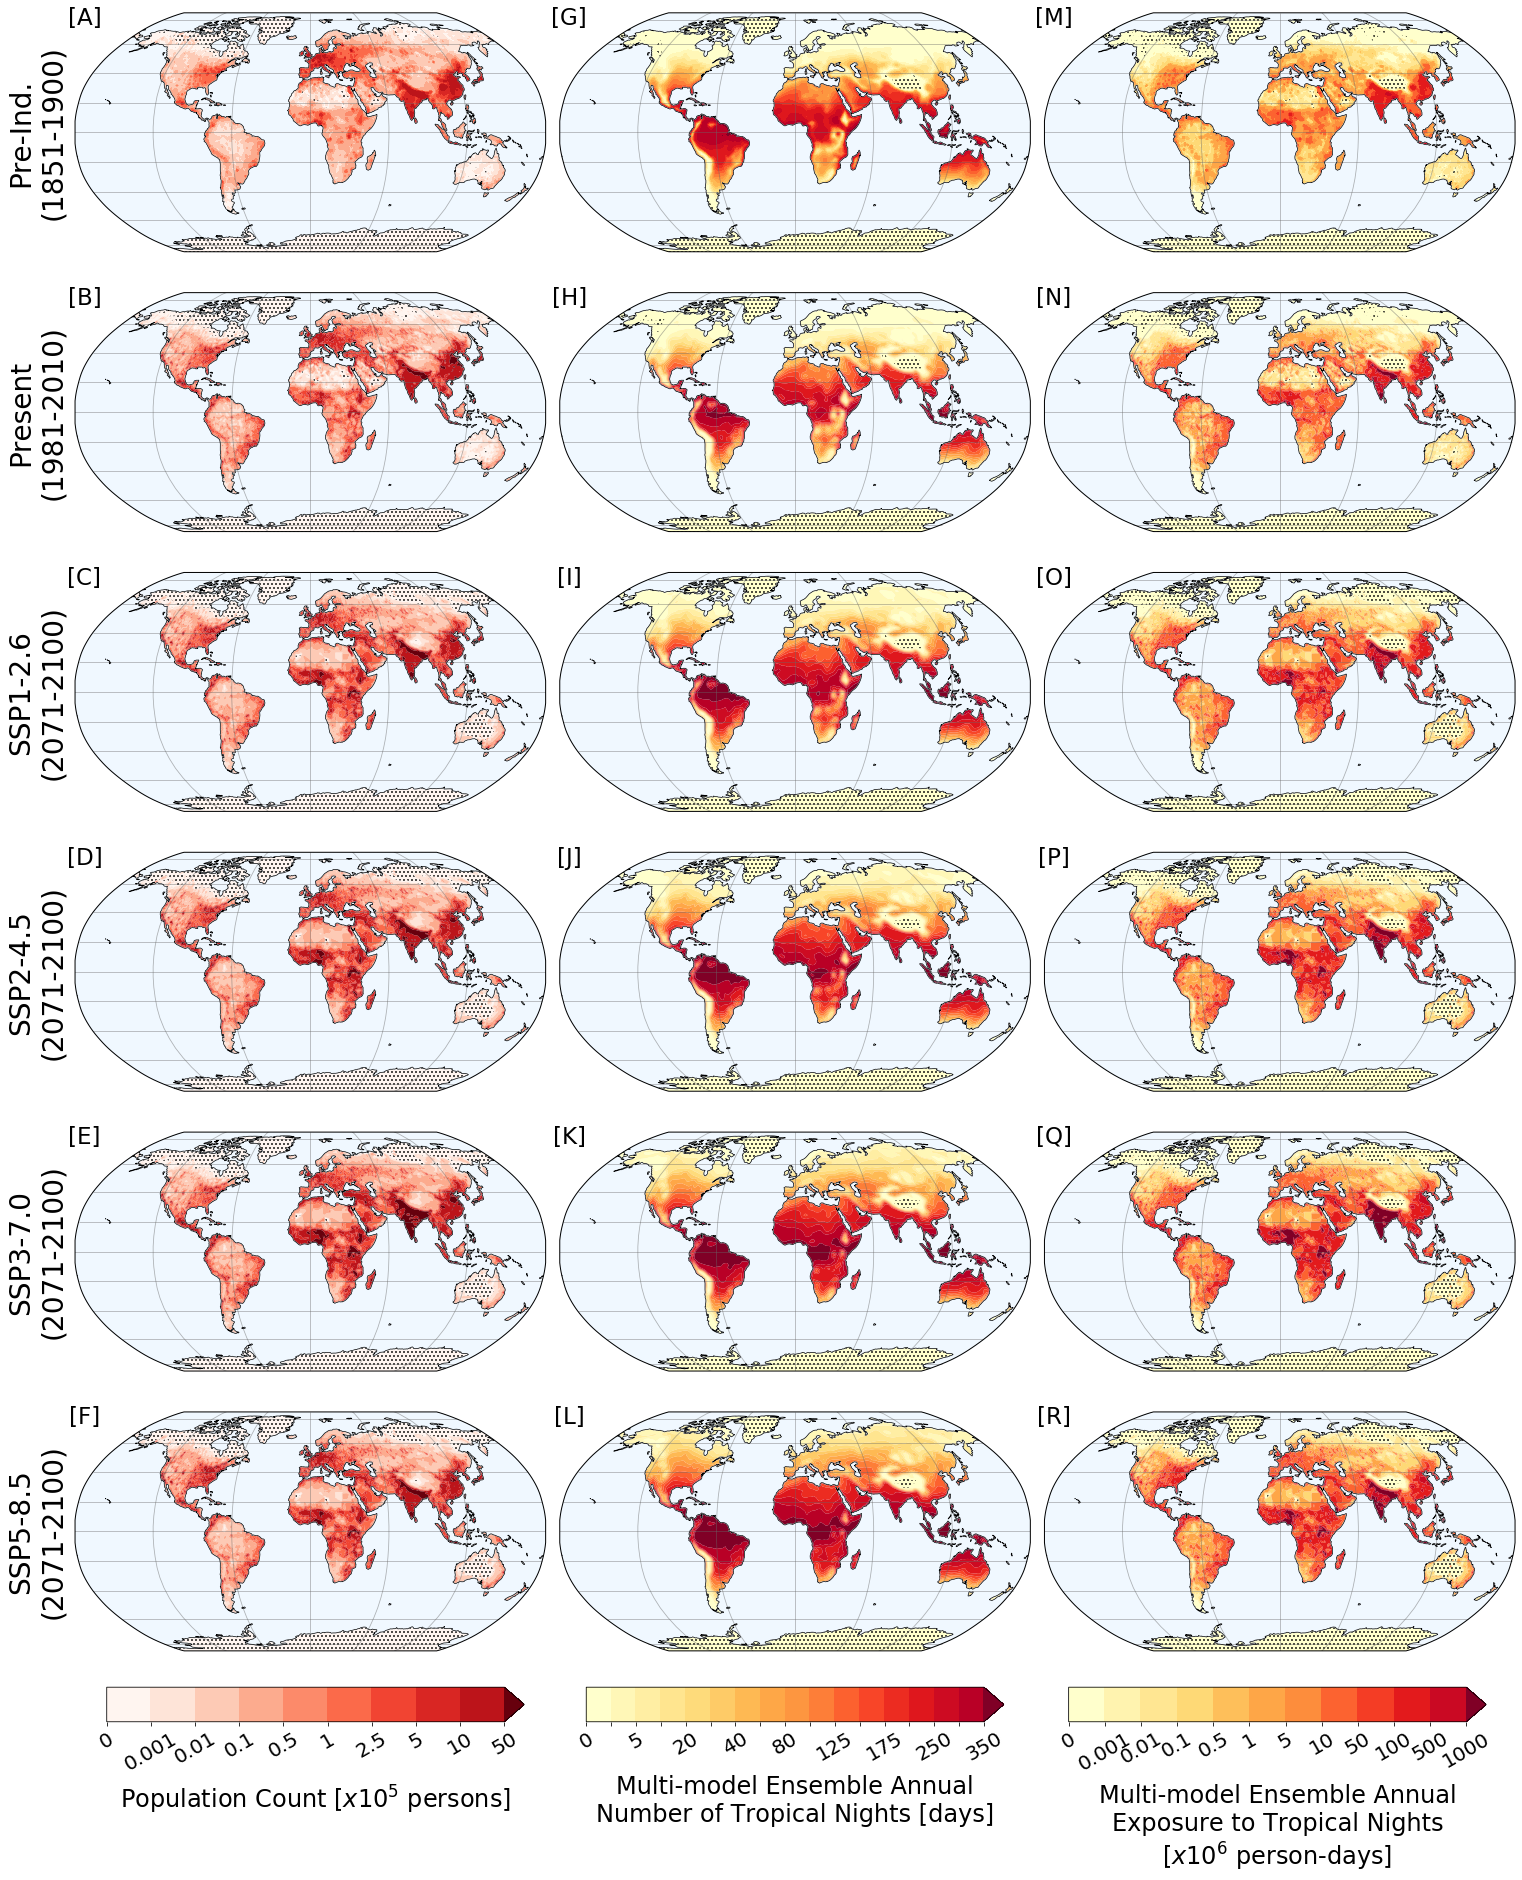

In [9]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_header_fs = 28
plot_label_fs = 23
tick_label_fs = 20


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 24),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'F')
col1, col2, col3 = axes[0: 6], axes[6: 12], axes[12: 18]
titles = ['Pre-Ind.', 'Present', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']
periods = ['1851-1900', '1981-2010', '2071-2100', '2071-2100', '2071-2100', '2071-2100']
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]', '[K]', '[L]',
         '[M]', '[N]', '[O]', '[P]', '[Q]', '[R]']

# create subplot bases
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.text(x = 0.02, y = 0.95, s = label[i], fontsize = plot_label_fs,
             horizontalalignment = 'center', transform = axs.transAxes)
for i, axs in enumerate(axes[0: 6]): # add scenario and associated time period to each row
        axs.text(x = -0.08, y = 0.5, s = f'{titles[i]}\n({periods[i]})', fontsize = plot_header_fs,
                 verticalalignment = 'center', horizontalalignment = 'center', rotation = 'vertical',
                 transform = axs.transAxes, weight = 'normal')
    
# adjust position of subplots to make space for colourbars beneath and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.01)


########## column 1: absolute population count ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0, 100, 1000, 10000, 50000, 100000, 250000, 500000, 1000000, 5000000, 10000000000])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('Reds', len(bnds1))
colours1 = list(colour_list1(np.arange(len(bnds1))))

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0: -1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([0, 100, 1000, 10000, 50000, 100000, 250000, 500000, 1000000, 5000000])

# map colourmap object to first output; to be used to plot colour bar
cm1 = col1[0].contourf(pop_ds.lon, pop_ds.lat, pop_ds['preind_mean_totalc'], 
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining outputs
for i, scenario in enumerate(['current', 'ssp1', 'ssp2', 'ssp3', 'ssp5']):
    col1[i + 1].contourf(pop_ds.lon, pop_ds.lat, pop_ds[f'{scenario}_mean_totalc'],
                         transform = transform, levels = lvls1, norm = norm1,
                         cmap = cmap1, extend = 'max',
                         antialiased = True)

# plot a hatch over areas with data equal to 0
for i, scenario in enumerate(['preind', 'current', 'ssp1', 'ssp2', 'ssp3', 'ssp5']):
    col1[i].contourf(pop_ds.lon, pop_ds.lat, 
                     pop_ds[f'{scenario}_mean_totalc'].where(pop_ds[f'{scenario}_mean_totalc'] == 0),
                     transform = transform, alpha = 0, # set fill 100% transparent
                     hatches = ['...'])

# add colourbar
mod_ticks1 = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 100000)) # custom formula for tick format
cb_axs1 = fig.add_axes([0.022, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max', orientation = 'horizontal',
                     ticks = lvls1, format = mod_ticks1)
cbar1.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar1.set_label(label = "Population Count [$x10^{5}$ persons]",
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## column 2: absolute annual number of tropical nights ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds2 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350, 400])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list2 = plt.cm.get_cmap('YlOrRd', len(bnds2))
colours2 = list(colour_list2(np.arange(len(bnds2))))

# create custom colourmap; set colours of values exceeding contour levels set
cmap2 = colors.ListedColormap(colours2[0 :-1], '') # create colourmap object from specified colours
cmap2.set_over(colours2[-1]) # set colour of values exceeding upper contour value
norm2 = colors.BoundaryNorm(boundaries = bnds2,
                            ncolors = len(bnds2) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls2 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350])

# map colourmap object to first model output; to be used in plot colour bar
cm2 = col2[0].contourf(tn_ds.lon, tn_ds.lat, tn_ds['pre_ind_mean_ann_tn_abso'],
                       transform = transform, levels = lvls2, norm = norm2,
                       cmap = cmap2, extend = 'max')

# plot remaining model outputs
for i, scenario in enumerate(['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
    col2[i + 1].contourf(tn_ds.lon, tn_ds.lat, tn_ds[f'{scenario}_mean_ann_tn_abso'],
                         transform = transform, levels = lvls2, norm = norm2,
                         cmap = cmap2, extend = 'max',
                         antialiased = True)
     
# plot a hatch over areas with data equal to 0; plotting before actual data to avoid N/A regions being missed
for i, scenario in enumerate(['pre_ind', 'current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
    col2[i].contourf(tn_ds.lon, tn_ds.lat, 
                     tn_ds[f'{scenario}_mean_ann_tn_abso'].where(tn_ds[f'{scenario}_mean_ann_tn_abso'] == 0, 1),
                     transform = transform, alpha = 0, # set plot completely transparent
                     levels = np.array([0, 1]), hatches = ['...', None], extend = 'both')

# add colourbar
cb_axs2 = fig.add_axes([0.355, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar2 = fig.colorbar(cm2, cax = cb_axs2, extend = 'both', orientation = 'horizontal',
                     ticks = lvls2)
cbar2.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar2.set_label(label = 'Multi-model Ensemble Annual\nNumber of Tropical Nights [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)
for label in cbar2.ax.xaxis.get_ticklabels()[1: : 2]: # set only one in two tick labels visible
    label.set_visible(False)


########## column 3: absolute annual heat exposure ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds3 = np.array([0, 1.0E3, 1.0E4, 1.0E5, 5.0E5, 1.0E6, 5.0E6, 1.0E7, 5.0E7, 1.0E8, 5.0E8, 1.0E9, 1.0E12])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list3 = plt.cm.get_cmap('YlOrRd', len(bnds3))
colours3 = colour_list3(np.arange(len(bnds3)))
colours3 = list(colours3)
                      
# create custom colourmap; set colours of values exceeding contour levels set
cmap3 = colors.ListedColormap(colours3[0 :-1], '') # create colourmap object from specified colours
cmap3.set_over(colours3[-1]) # set colour of values exceeding upper contour value
norm3 = colors.BoundaryNorm(boundaries = bnds3,
                            ncolors = len(bnds3) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls3 = np.array([0, 1.0E3, 1.0E4, 1.0E5, 5.0E5, 1.0E6, 5.0E6, 1.0E7, 5.0E7, 1.0E8, 5.0E8, 1.0E9])
           
# map colourmap object to first model output; to be used in plot colour bar
cm3 = col3[0].contourf(exp_ds.lon, exp_ds.lat, exp_ds['pre_ind_mean_exposure_abso'],
                       transform = transform, levels = lvls3, norm = norm3,
                       cmap = cmap3, extend = 'max')

# plot remaining model outputs
for i, scenario in enumerate(['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
    col3[i + 1].contourf(exp_ds.lon, exp_ds.lat, exp_ds[f'{scenario}_mean_exposure_abso'],
                         transform = transform, levels = lvls3, norm = norm3,
                         cmap = cmap3, extend = 'max',
                         antialiased = True)
    
# plot a hatch over areas with data equal to 0
for i, scenario in enumerate(['pre_ind', 'current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
    col3[i].contourf(exp_ds.lon, exp_ds.lat, 
                     exp_ds[f'{scenario}_mean_exposure_abso'].where(exp_ds[f'{scenario}_mean_exposure_abso'] == 0),
                     transform = transform, alpha = 0, # set plot completely transparent
                     hatches = ['...'])

# add colourbar
mod_ticks3 = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e6)) # custom formula for tick format
cb_axs3 = fig.add_axes([0.69, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar3 = fig.colorbar(cm3, cax = cb_axs3, extend = 'both', orientation = 'horizontal', ticks = lvls3,
                     format = mod_ticks3)
cbar3.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar3.set_label(label = 'Multi-model Ensemble Annual\nExposure to Tropical Nights\n[$x10^{6}$ person-days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/multi_model_ensemble_combined_abso_variables.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)